# Maximum Clique with D-Wave

Ocean D-Waves Systems beschikt over een `maximum_clique` functie: [docs](https://docs.ocean.dwavesys.com/en/stable/docs_dnx/reference/algorithms/generated/dwave_networkx.maximum_clique.html)  

Gebaseerd op [QUBO](https://en.wikipedia.org/wiki/Quadratic_unconstrained_binary_optimization)  

Lukt voor 2x2 TeraVex uit te rekenen.   
Bij 3x3 wordt er een clique teruggegeven, maar te klein (niet compleet)
  
[Solve large QUBO Problem](https://support.dwavesys.com/hc/en-us/community/posts/360029426154-Solving-a-large-QUBO-problem)  
[Getting started with D-Wave](https://docs.dwavesys.com/docs/latest/doc_getting_started.html)

In [1]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave_networkx as dnx

import numpy as np
import networkx as nx
from matplotlib.tri import Triangulation
from matplotlib import pyplot as plt

In [2]:
# Get the values & pieces from the TetraVex game
# Values are for visualization
# Pieces are for the algorithm
def getValuesAndPieces(file):
    north = []
    east = []
    south = []
    west = []
    pieces = {}
    i = 0
    for line in file:
        sides = line.split(" ")
        pieces[i] = [int(sides[0]), int(sides[1]), int(sides[2]), int(sides[3])]
        i += 1
        north.append([int(sides[0])])
        east.append([int(sides[1])])
        south.append([int(sides[2])])
        west.append([int(sides[3])])

    values = [north, east, south, west]
    print("values: " + str(values))
    print("pieces: " + str(pieces))
    return values, pieces

In [3]:
def visualizeBoard(values, sizeBoard):
    xv, yv = np.meshgrid(np.arange(-0.5, sizeBoard), np.arange(-0.5, sizeBoard))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, sizeBoard), np.arange(0, sizeBoard))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (sizeBoard + 1) * (sizeBoard + 1)  # indices of the centers

    trianglesN = [(i + j * (sizeBoard + 1), i + 1 + j * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesE = [(i + 1 + j * (sizeBoard + 1), i + 1 + (j + 1) * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesS = [(i + 1 + (j + 1) * (sizeBoard + 1), i + (j + 1) * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesW = [(i + (j + 1) * (sizeBoard + 1), i + j * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    triangul = [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

    cmaps = 'tab10' # Color map based out of 10 colors
    fig, ax = plt.subplots()
    imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmaps, vmin=0, vmax=9, ec='white')
                for t, val in zip(triangul, values)]

    # TODO Add text (nog te fixen)
    # for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    #     for i in range(M):
    #         for j in range(N):
    #             v = val[j, i]
    #             ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.2f}', color='k' if 0.2 < v < 0.8 else 'w', ha='center', va='center')
    # cbar = fig.colorbar(imgs[0], ax=ax)

    ax.set_xticks(range(sizeBoard))
    ax.set_yticks(range(sizeBoard))
    ax.invert_yaxis()
    ax.margins(x=0, y=0)
    ax.set_aspect('equal', 'box')  # square cells
    plt.tight_layout()
    plt.show()

values: [[[6], [7], [5], [7], [3], [8], [8], [4], [5]], [[8], [1], [1], [5], [6], [9], [3], [3], [9]], [[7], [3], [8], [8], [4], [5], [7], [5], [2]], [[2], [8], [1], [7], [5], [6], [4], [3], [3]]]
pieces: {0: [6, 8, 7, 2], 1: [7, 1, 3, 8], 2: [5, 1, 8, 1], 3: [7, 5, 8, 7], 4: [3, 6, 4, 5], 5: [8, 9, 5, 6], 6: [8, 3, 7, 4], 7: [4, 3, 5, 3], 8: [5, 9, 2, 3]}


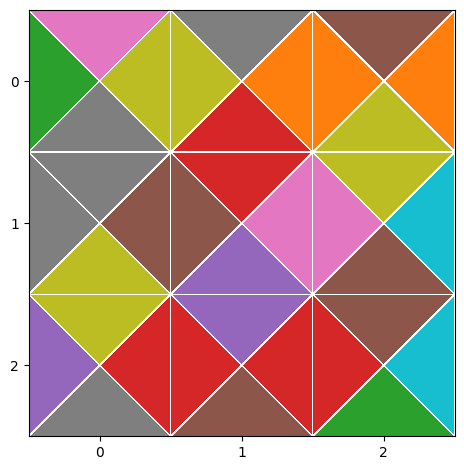

In [4]:
# Solution
sizeBoard = 3
file = open("./dataFiles/TetraVex_3x3_Solution.txt", "r")
values, pieces = getValuesAndPieces(file)
visualizeBoard(values, sizeBoard)

values: [[[7], [5], [3], [5], [6], [8], [8], [4], [7]], [[1], [9], [6], [1], [8], [9], [3], [3], [5]], [[3], [2], [4], [8], [7], [5], [7], [5], [8]], [[8], [3], [5], [1], [2], [6], [4], [3], [7]]]
pieces: {0: [7, 1, 3, 8], 1: [5, 9, 2, 3], 2: [3, 6, 4, 5], 3: [5, 1, 8, 1], 4: [6, 8, 7, 2], 5: [8, 9, 5, 6], 6: [8, 3, 7, 4], 7: [4, 3, 5, 3], 8: [7, 5, 8, 7]}


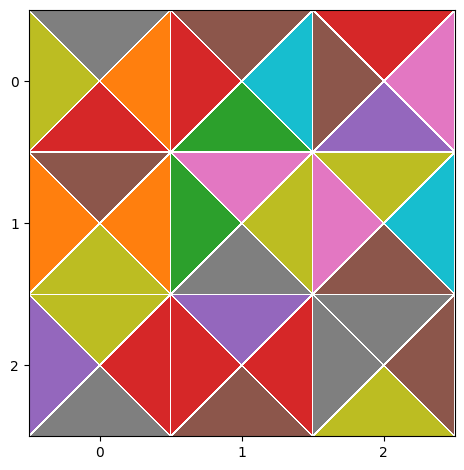

In [5]:
# Start board
sizeBoard = 3
file = open("./dataFiles/TetraVex_3x3.txt", "r")
values, pieces = getValuesAndPieces(file)
visualizeBoard(values, sizeBoard)

In [6]:
def visualizeSolution(max_clique_solution):
    north = [0] * (sizeBoard * sizeBoard)
    east = [0] * (sizeBoard * sizeBoard)
    south = [0] * (sizeBoard * sizeBoard)
    west = [0] * (sizeBoard * sizeBoard)

    for node in max_clique_solution:
        node = str(node).split(";")
        for i in range(0, len(node)):
            node[i] = int(node[i])

        if(node[0] == 0):
            north[node[1]] = pieces.get(node[2])[0]
            east[node[1]] = pieces.get(node[2])[1]
            south[node[1]] = pieces.get(node[2])[2]
            west[node[1]] = pieces.get(node[2])[3]
        if(node[0] == 1):
            north[node[1] + sizeBoard] = pieces.get(node[2])[0]
            east[node[1] + sizeBoard] = pieces.get(node[2])[1]
            south[node[1] + sizeBoard] = pieces.get(node[2])[2]
            west[node[1] + sizeBoard] = pieces.get(node[2])[3]
        if(node[0] == 2):
            north[node[1] + 2*sizeBoard] = pieces.get(node[2])[0]
            east[node[1] + 2*sizeBoard] = pieces.get(node[2])[1]
            south[node[1] + 2*sizeBoard] = pieces.get(node[2])[2]
            west[node[1] + 2*sizeBoard] = pieces.get(node[2])[3]   
    values = [north, east, south, west]
    visualizeBoard(values, sizeBoard)

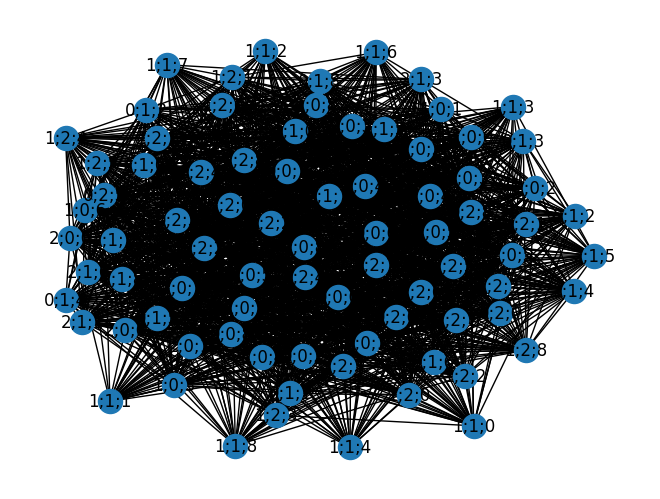

Graph: 81 nodes, 1854 edges


In [7]:
# Build Graph
size = len(pieces)
graph = {}
for piece1, colors1 in pieces.items():
    for row1 in range(sizeBoard):
        for col1 in range(sizeBoard):
            for piece2, colors2 in pieces.items():
                if piece1 == piece2:
                        continue
                for row2 in range(sizeBoard):
                    for col2 in range(sizeBoard): 
                        if row1 == row2 and col1 == col2:
                            continue
                        node1 = (row1, col1, piece1)
                        node2 = (row2, col2, piece2)

                        graph.setdefault(node1, []).append(node2)

                        if row1-1 == row2 and col1 == col2 \
                            and colors1[0] != colors2[2]:
                                graph[node1].remove(node2)

                        if row1 == row2-1 and col1 == col2 \
                            and colors1[2] != colors2[0]:
                                graph[node1].remove(node2)

                        if row1 == row2 and col1-1 == col2 \
                            and colors1[3] != colors2[1]:
                                graph[node1].remove(node2)   

                        if row1 == row2 and col1 == col2-1 \
                            and colors1[1] != colors2[3]:
                                graph[node1].remove(node2) 

# for node, edges in graph.items():
#     print(str(node) + ": " + str(edges))
G = nx.Graph()
for node, edges in graph.items():
    for edge in edges:
        nodeStr = str(node[0]) + ";" + str(node[1]) + ";" + str(node[2])
        edgeStr = str(edge[0]) + ";" + str(edge[1]) + ";" + str(edge[2])
        G.add_edge(nodeStr, edgeStr)
nx.draw(G, with_labels = True)
plt.show()

print("Graph: " + str(G.number_of_nodes()) + " nodes, " + str(G.number_of_edges()) + " edges")

In [8]:
sampler = EmbeddingComposite(DWaveSampler())
labelStr = 'Maximum Clique - TetraVex - ' + str(sizeBoard) + 'x' + str(sizeBoard)

maxClique =  dnx.algorithms.maximum_clique(G, sampler, label=labelStr)

In [9]:
print("Max Clique Result: ", maxClique)
if(len(maxClique) == sizeBoard*sizeBoard):
    visualizeSolution(maxClique)
else:
    print("No solution found")

Max Clique Result:  ['0;1;0', '0;2;0', '1;2;7', '1;2;8', '2;0;1', '2;1;1', '2;1;6']
No solution found


: 